# Pythermalcomfort Plotting Examples

This notebook demonstrates the plotting functionality in pythermalcomfort.

## Architecture Overview

The plotting system uses a three-tier architecture:

1. **Style** (mutable) - Figure styling (colors, fonts, sizes)
2. **Scene** (frozen) - Background context computed from thermal comfort models
3. **DataSeries** (frozen) - Overlay data with optional summary distribution

In [1]:
import numpy as np
from pythermalcomfort.models import pmv_ppd_iso, heat_index_rothfusz
from pythermalcomfort.plots import Plot

## 1. Generic Range chart

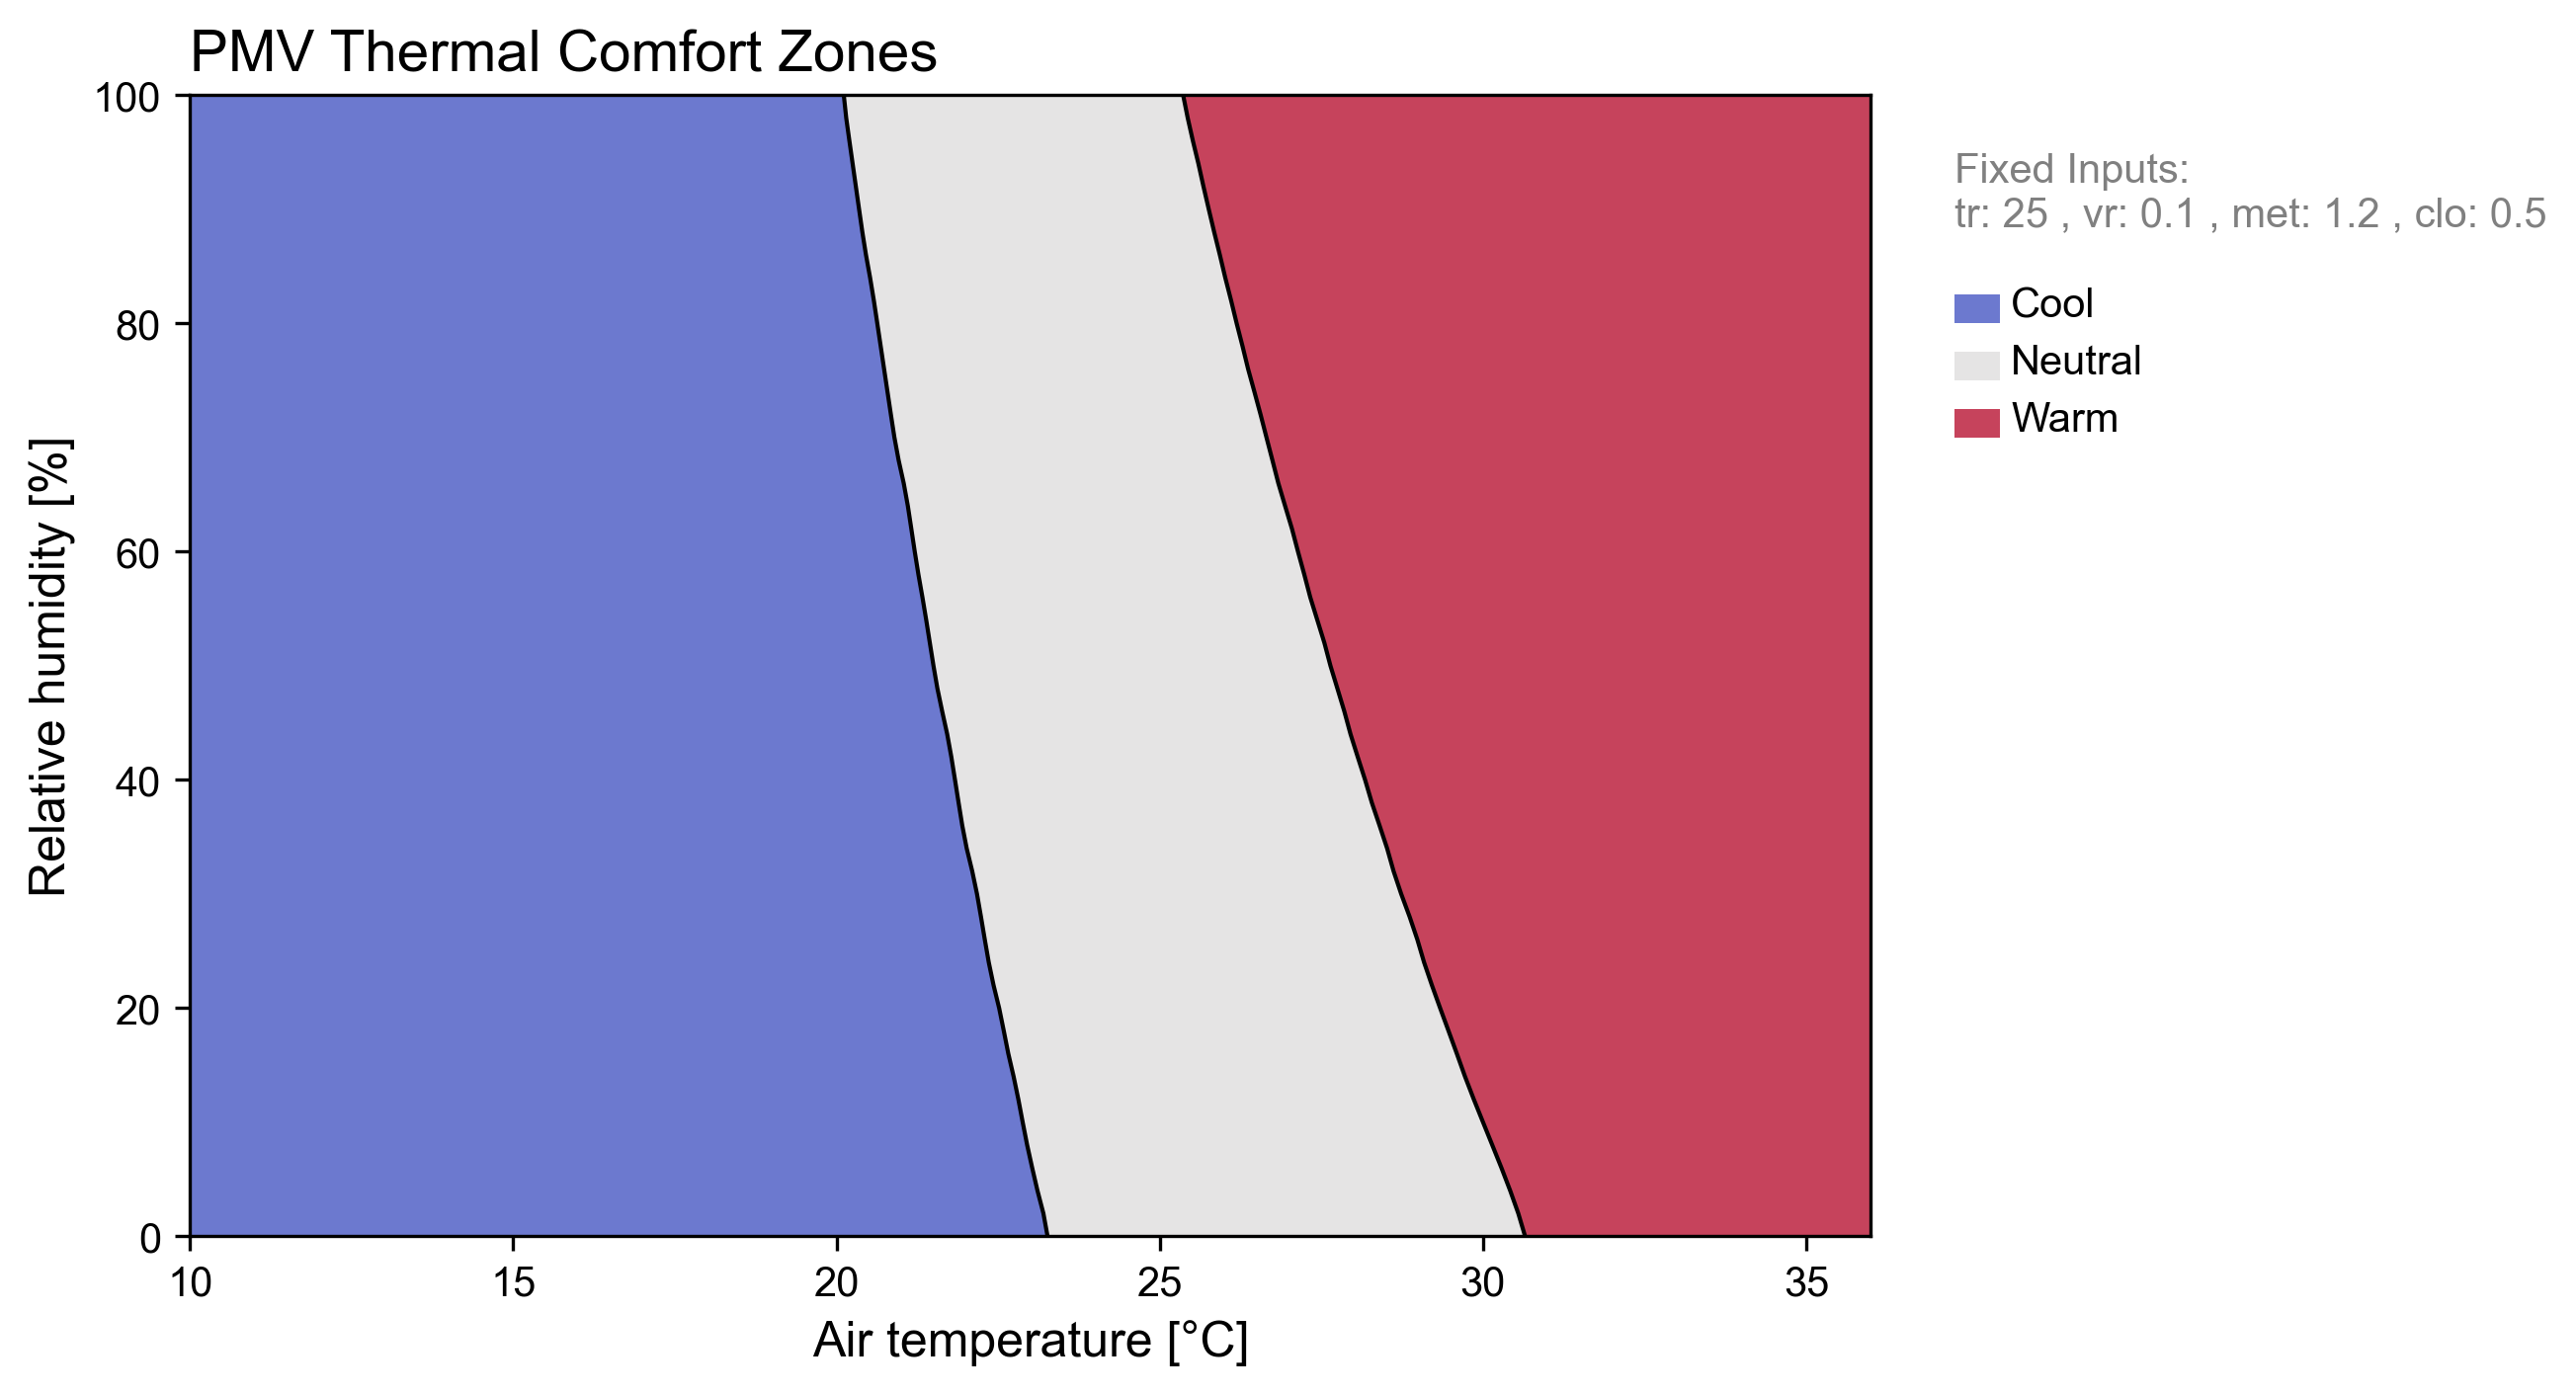

In [2]:
plot = Plot.range(
    pmv_ppd_iso,
    fixed_params={"tr": 25, "vr": 0.1, "met": 1.2, "clo": 0.5}
)
plot.style.title = "PMV Thermal Comfort Zones"
fig, ax = plot.render()

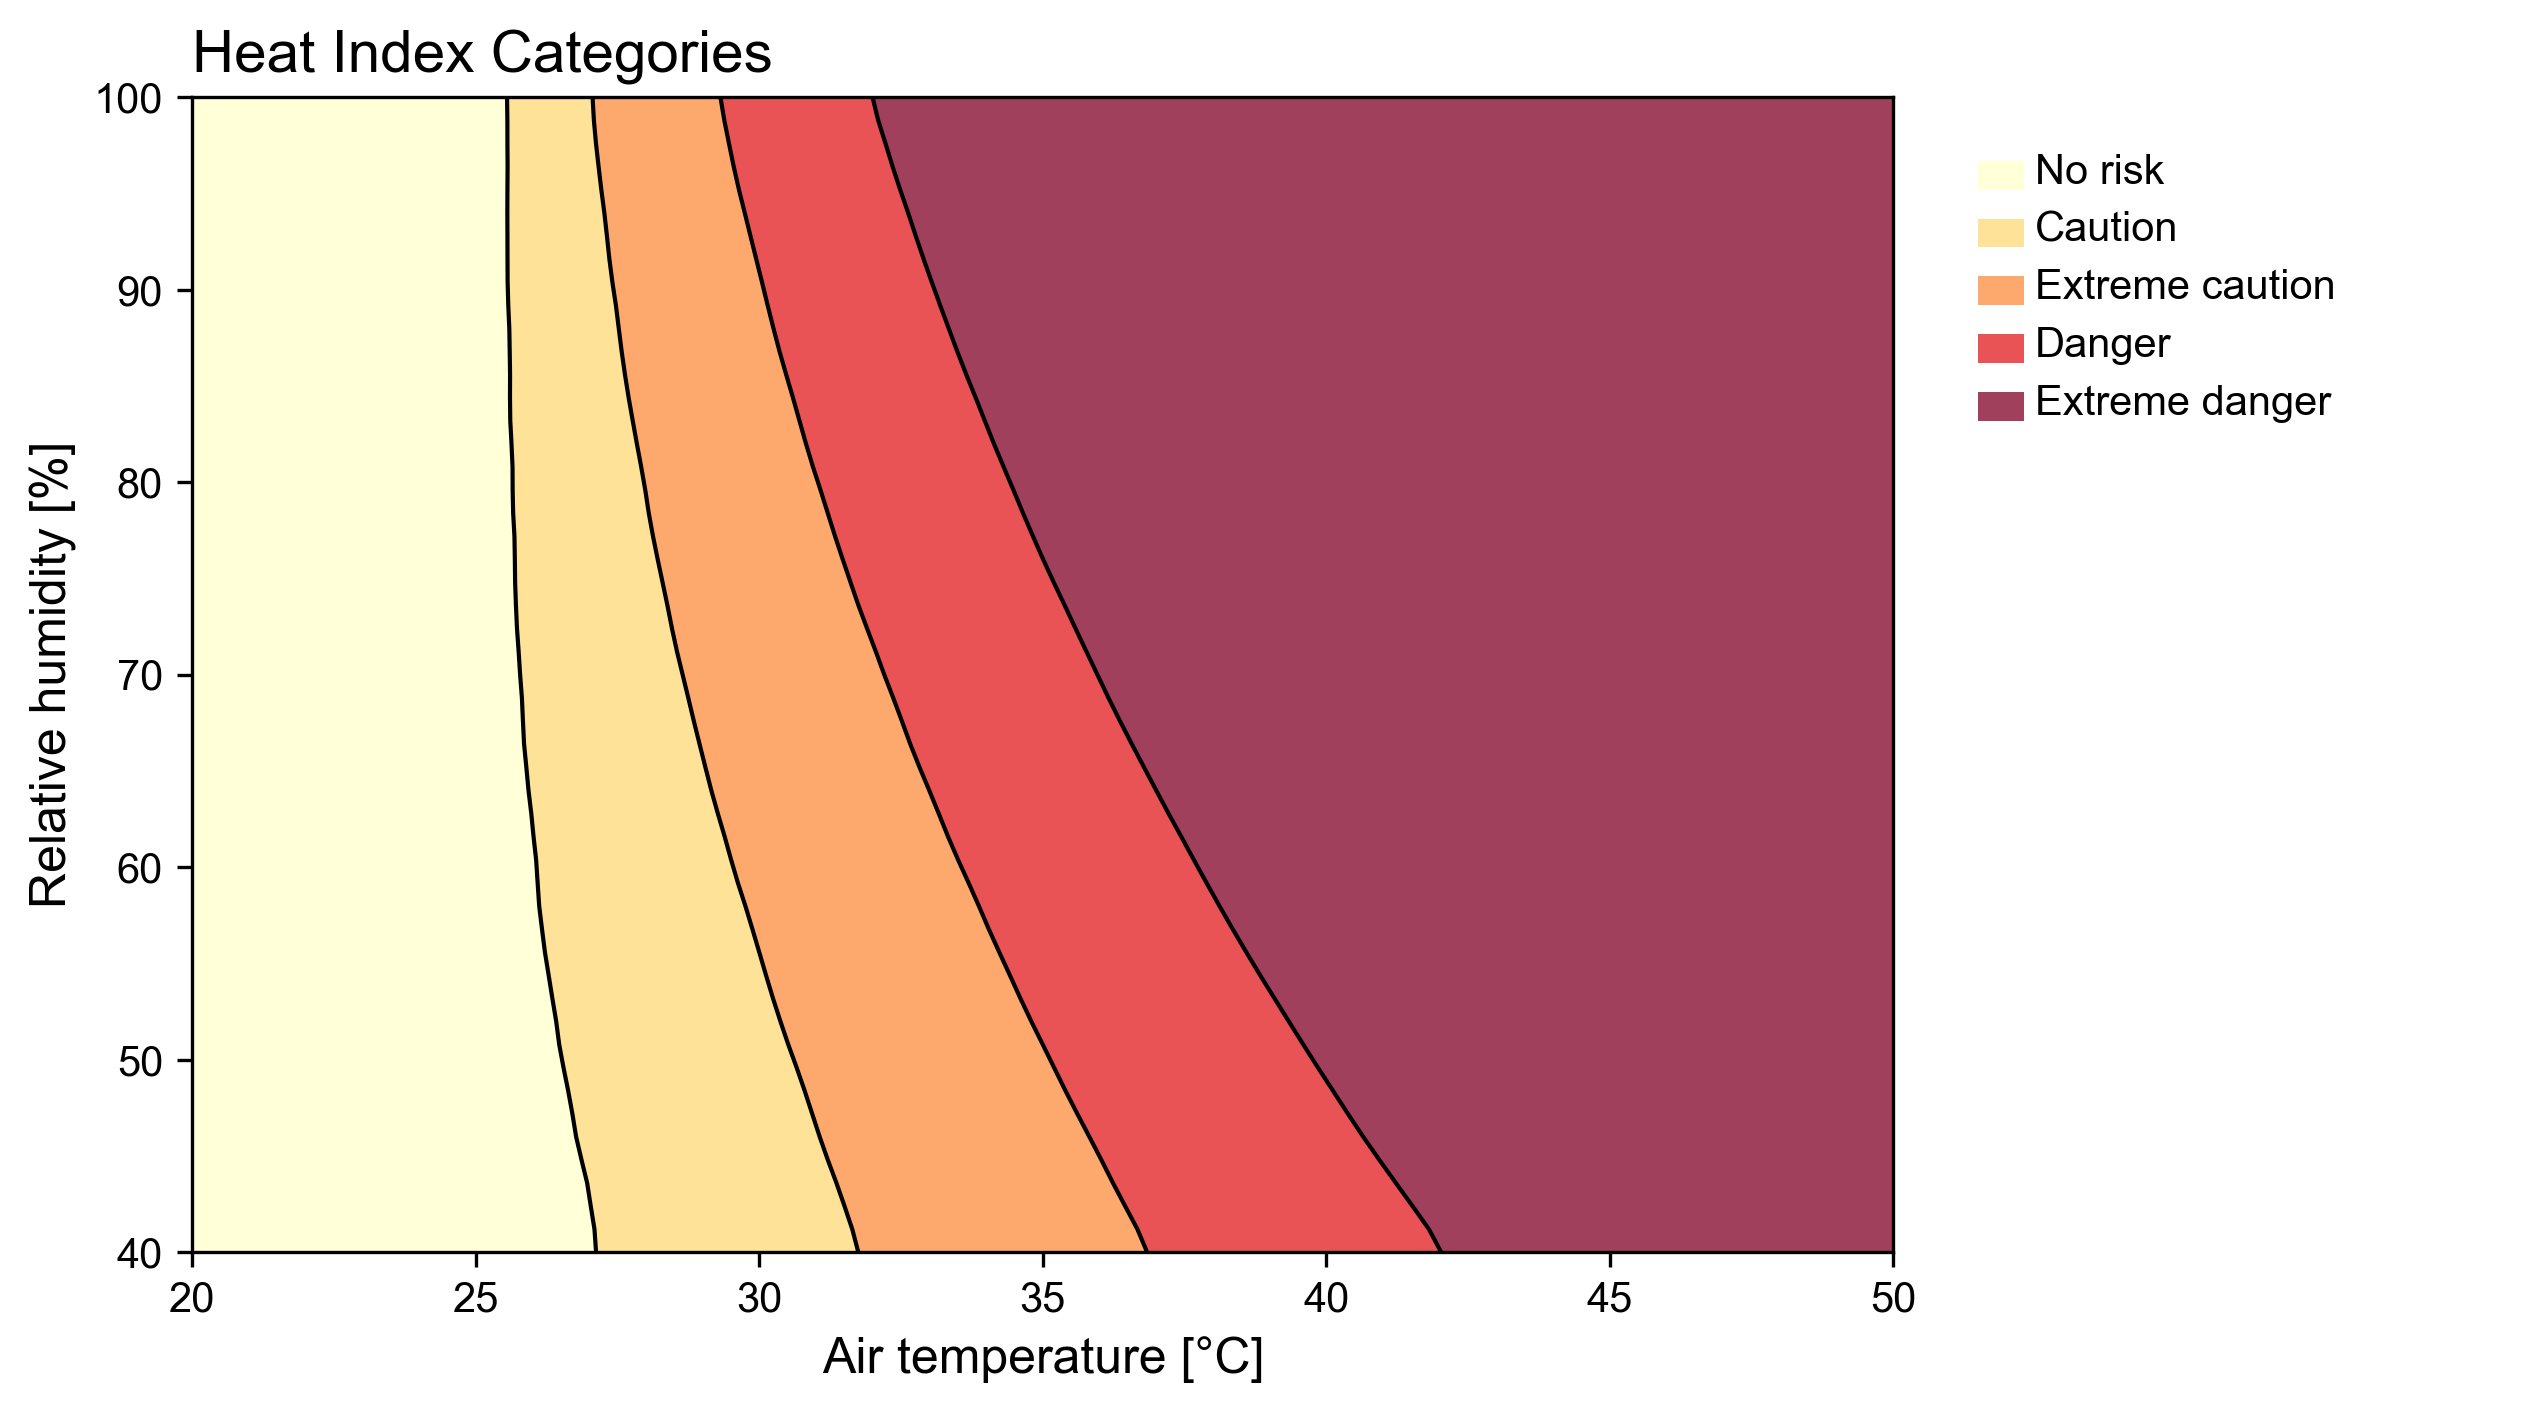

In [3]:
plot = Plot.range(heat_index_rothfusz)
plot.style.title = "Heat Index Categories"
fig, ax = plot.render()

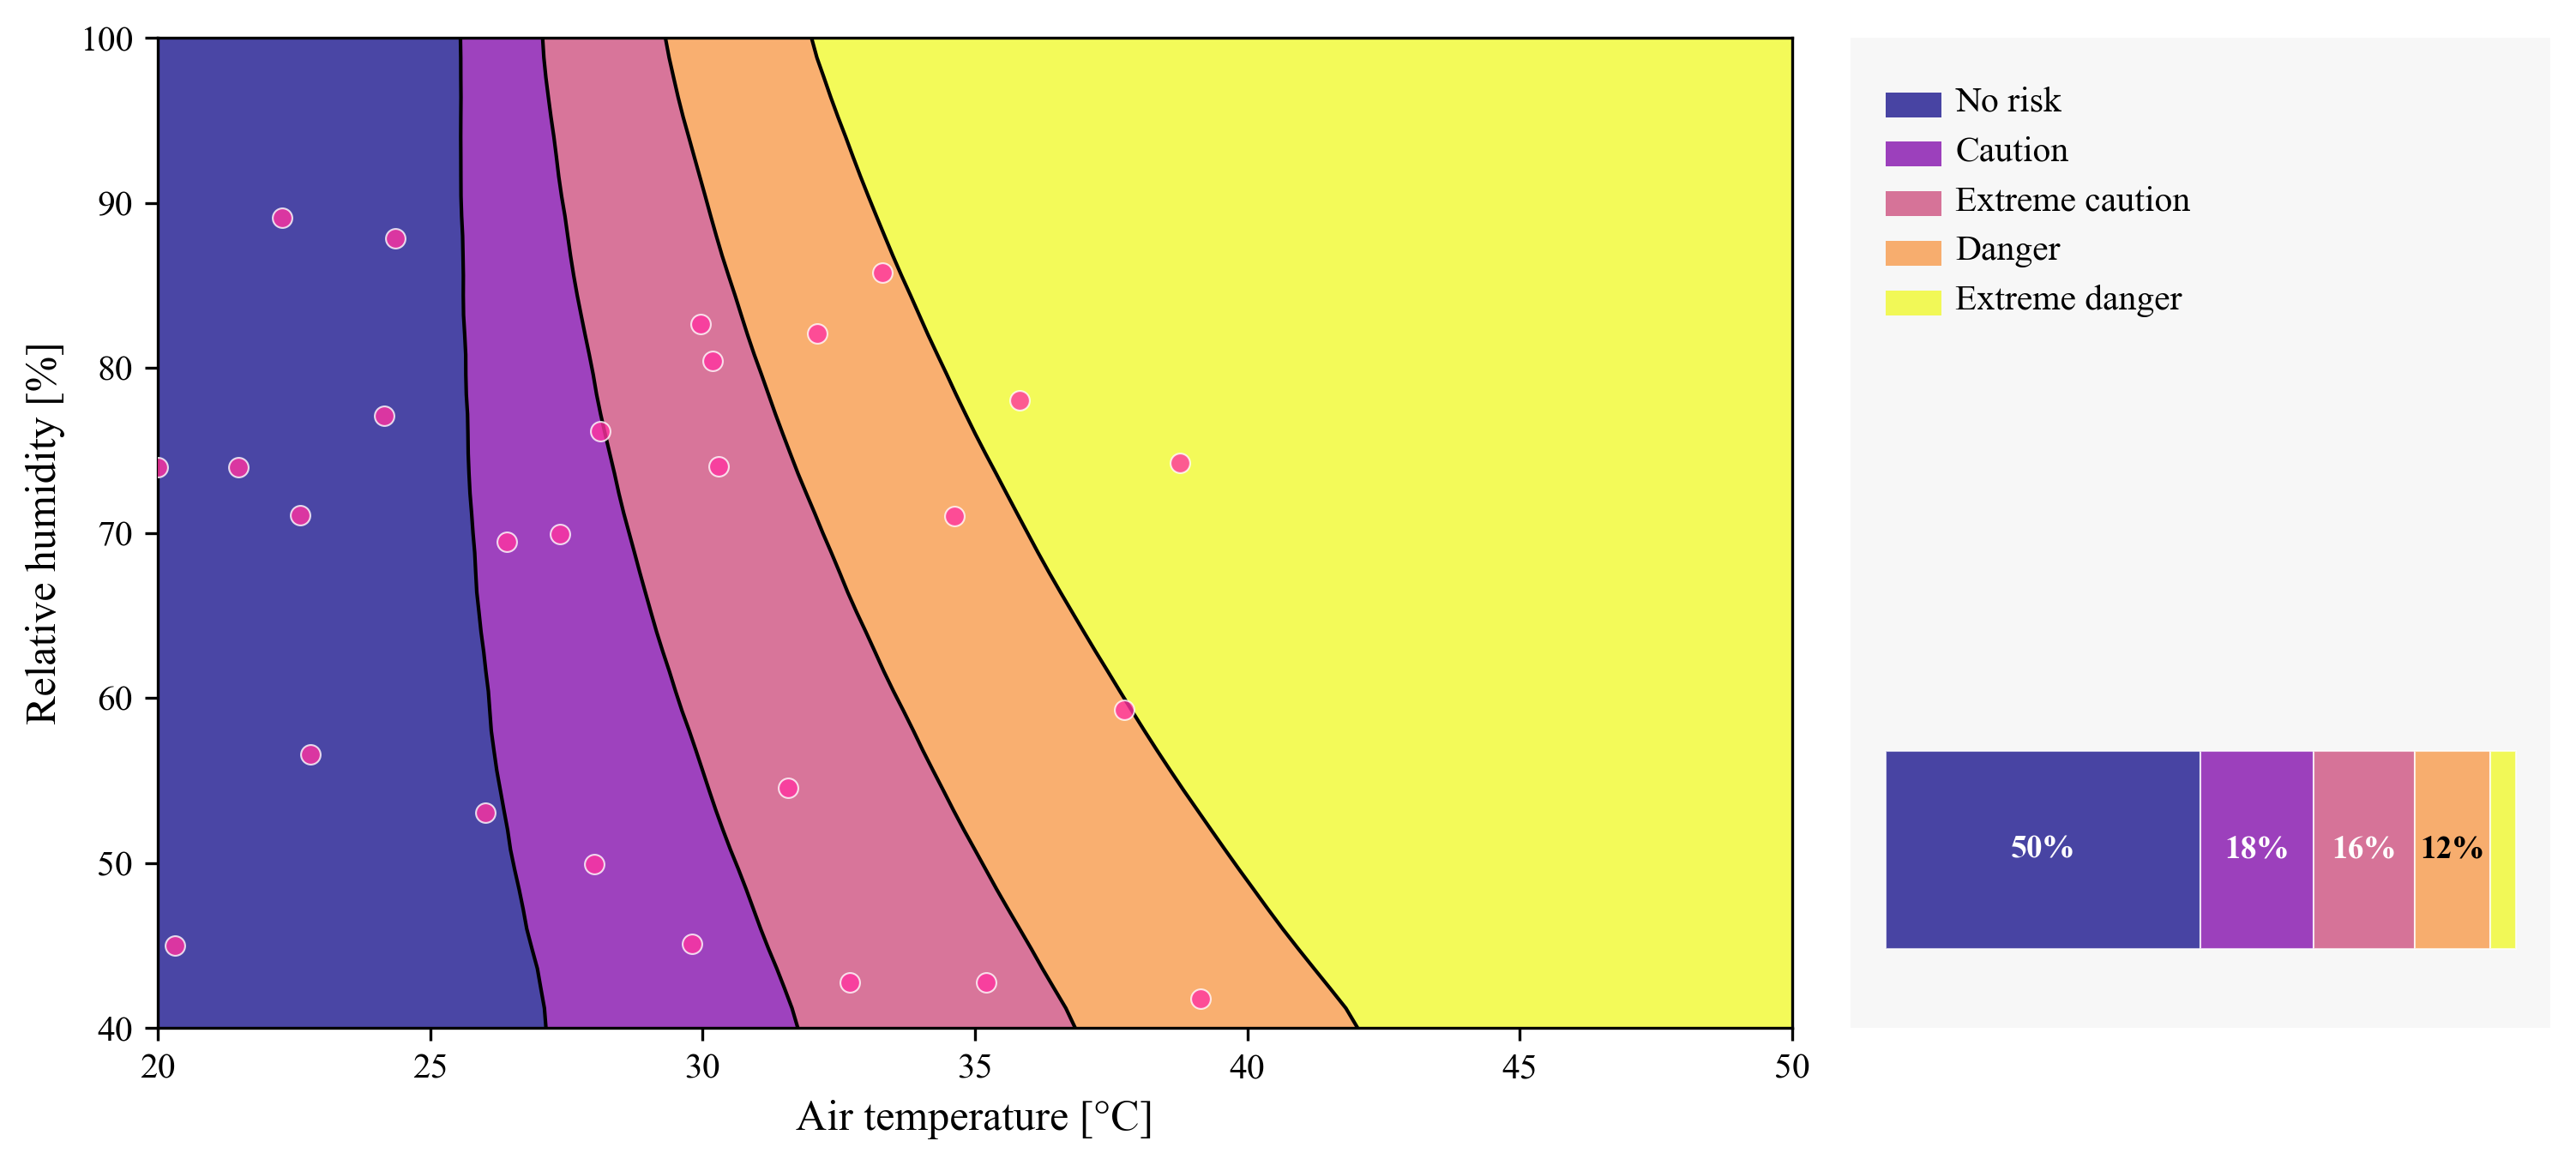

In [4]:
# Generate sample measurement data
np.random.seed(42)
temps = np.random.uniform(15, 40, 50)
rh_vals = np.random.uniform(20, 90, 50)

# Create plot and add data
plot = Plot.range(heat_index_rothfusz)
plot = plot.add_data(temps, rh_vals)
plot.style.show_summary = True
plot.style.font_family = "Times New Roman"  # Custom font
plot.style.summary_bar_height = 0.2  # Adjusted height
plot.style.summary_bar_width = 0.9    # Adjusted vertical position
plot.style.font_sizes = {"summary": 9}  # Smaller font for info panel
plot.style.info_panel_width = 0.3  # Adjusted width
plot.style.info_panel_background = "#f0f0f0"  # Light gray background
plot.style.info_panel_alpha = 0.5  # Semi-transparent info panel
plot.style.cmap = "plasma"  # Different colormap
plot.style.scatter_color = "#FF33A0"  # Custom scatter color
plot.style.figsize = (12, 5)

fig, ax = plot.render()

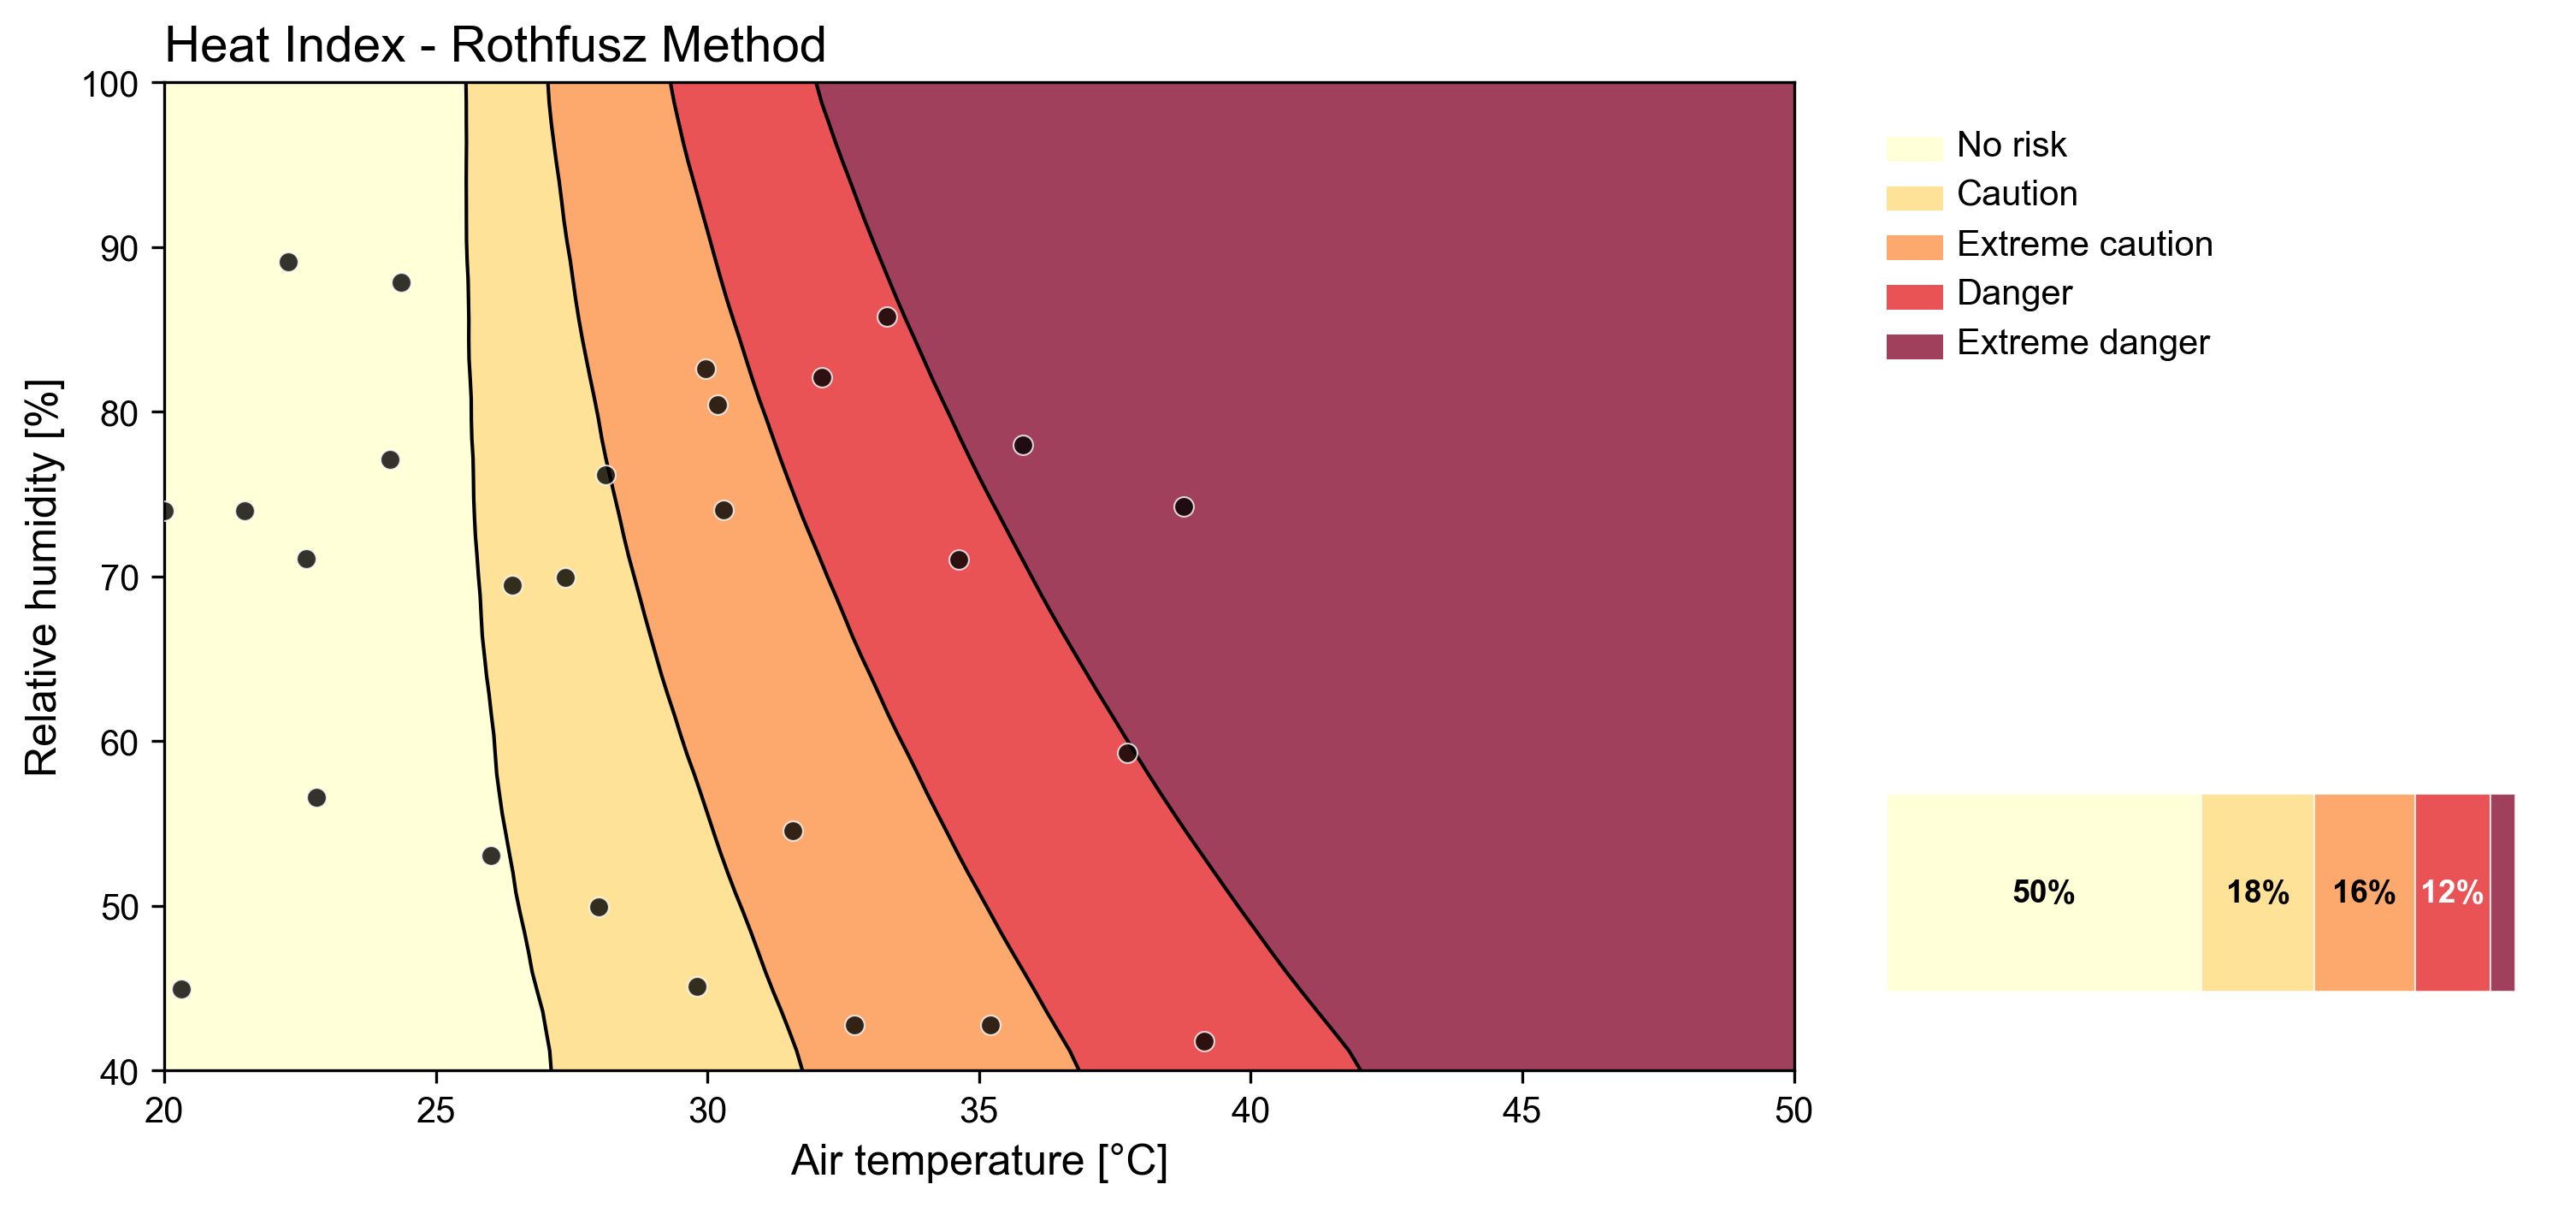

In [22]:
plot = Plot.range(heat_index_rothfusz)
plot = plot.add_data(temps, rh_vals)
plot.style.title = "Heat Index - Rothfusz Method"
plot.style.show_summary = True
plot.style.summary_bar_height = 0.2  # Adjusted height
plot.style.summary_bar_width = 0.9    # Adjusted vertical position
plot.style.font_sizes = {"summary": 9}  # Smaller font for info panel
plot.style.info_panel_width = 0.3  # Adjusted width
plot.style.scatter_color = "#000000"  # Custom scatter color
plot.style.figsize = (12, 5)

fig, ax = plot.render()

## 2. Adaptive Chart

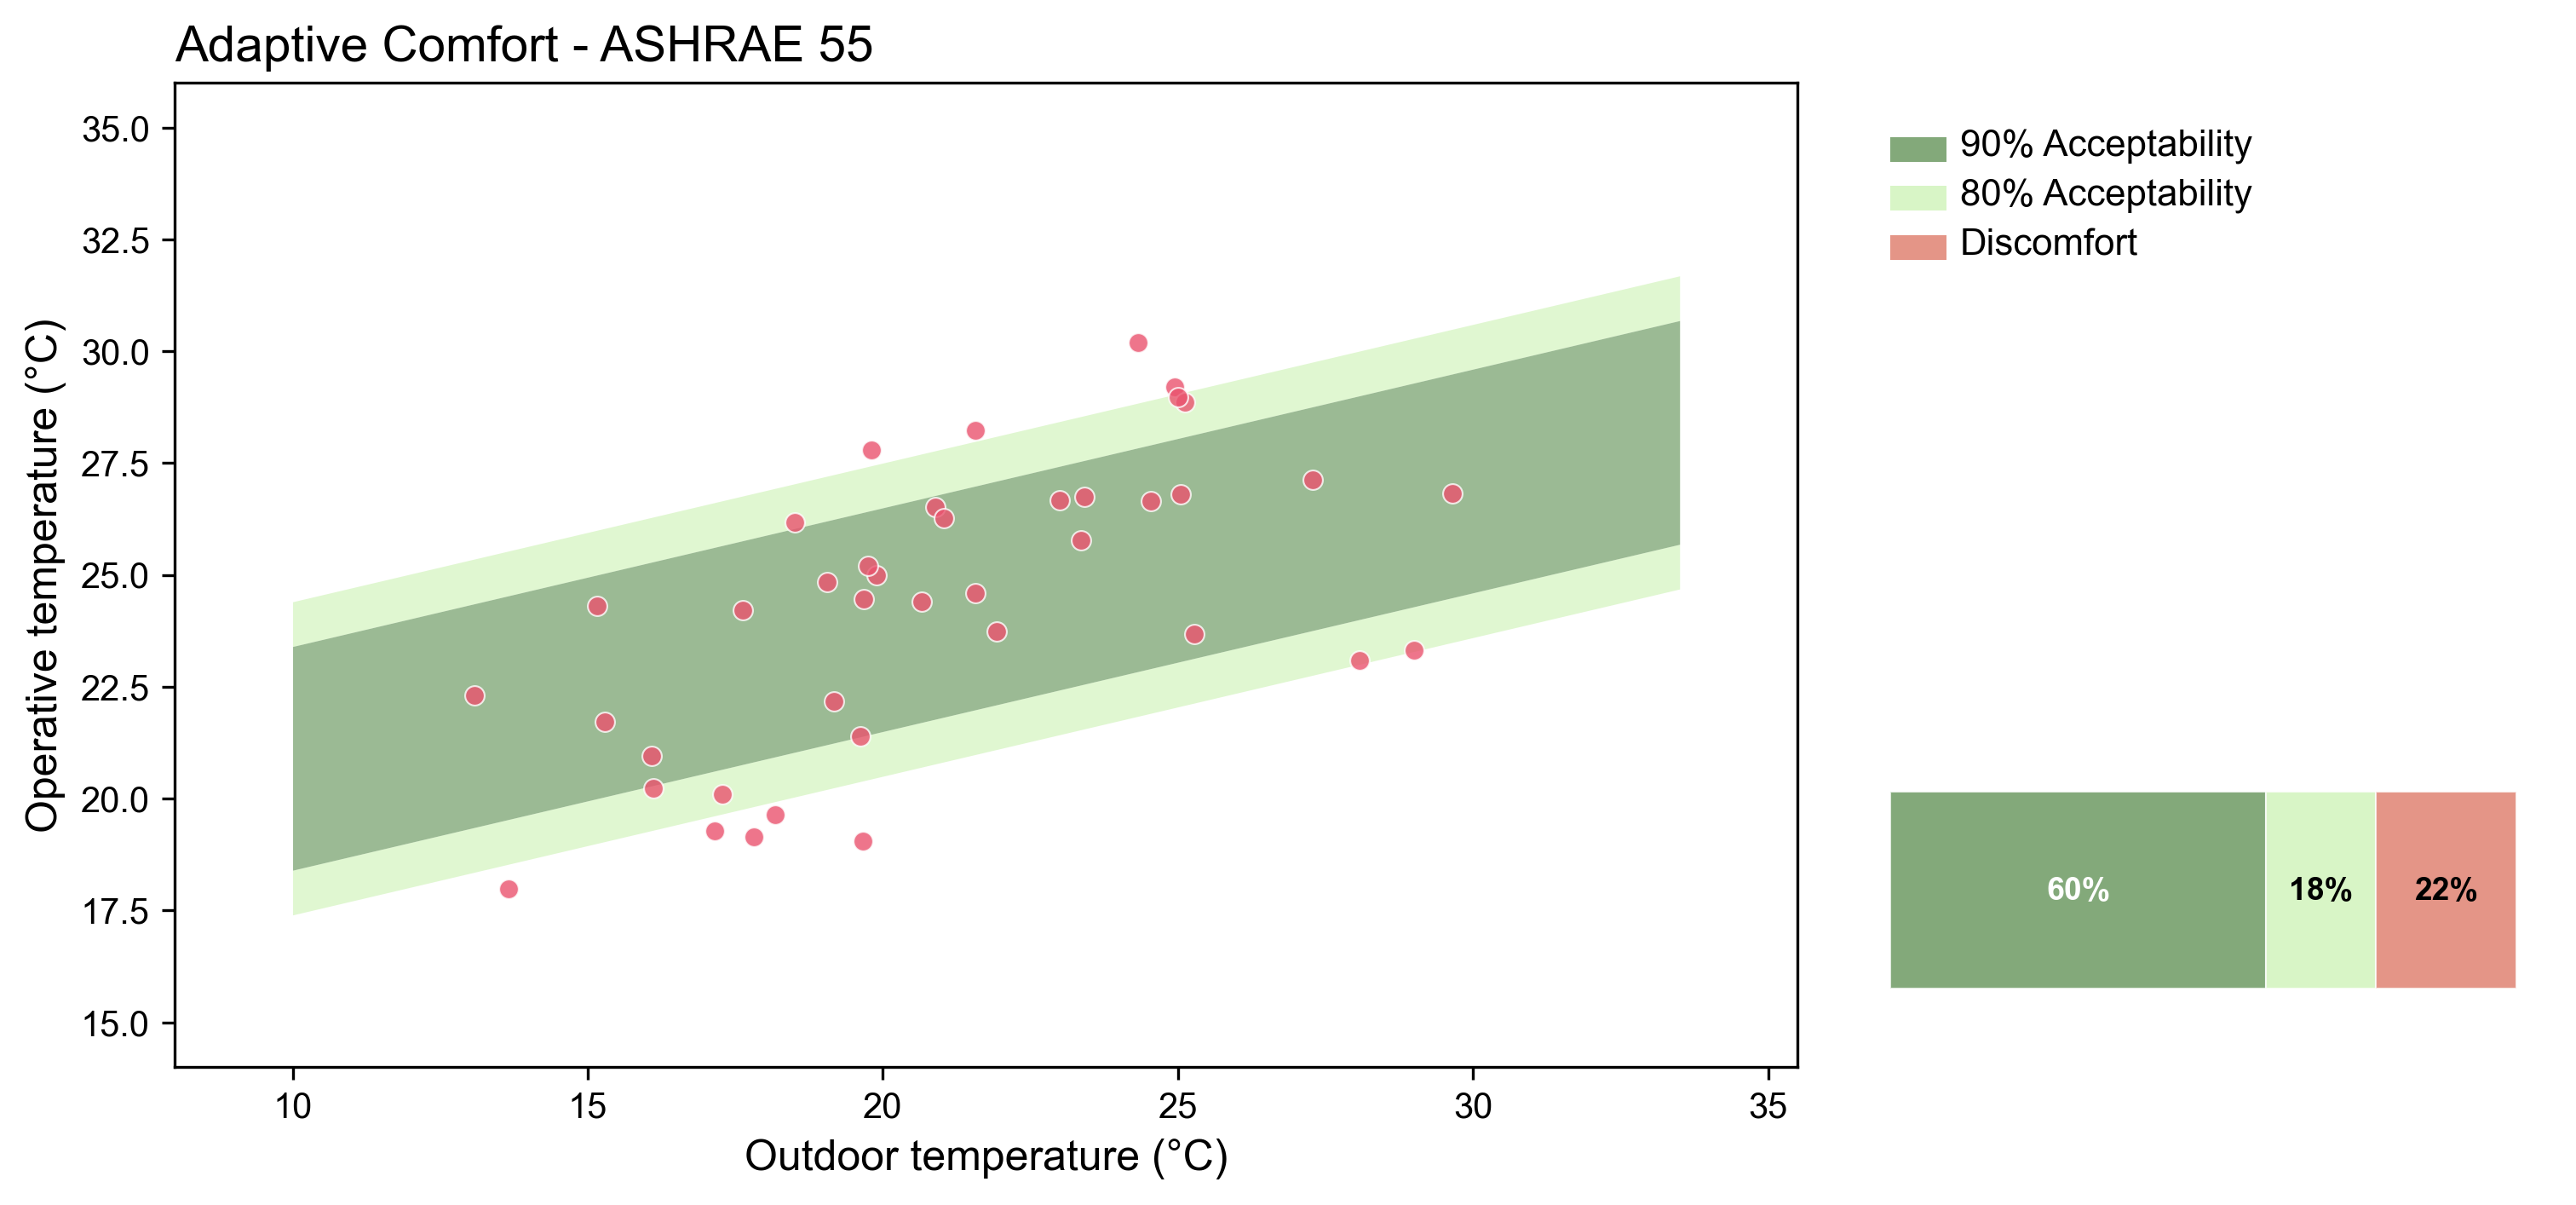

In [29]:
# Generate sample data around comfort line
np.random.seed(123)
t_outdoor = np.random.uniform(12, 30, 40)
# Comfort temp = 0.31 * t_outdoor + 17.8, add some noise
t_operative = 0.31 * t_outdoor + 17.8 + np.random.uniform(-5, 5, 40)

plot = Plot.adaptive()
plot = plot.add_data(t_outdoor, t_operative)
plot.style.title = "Adaptive Comfort - ASHRAE 55"
plot.style.show_summary = True
plot.style.summary_bar_height = 0.2
plot.style.info_panel_width = 0.3
plot.style.font_sizes = {"summary": 9, "legend": 10.5}
plot.style.ylabel = "Operative temperature (°C)"
plot.style.xlabel = "Outdoor temperature (°C)"
plot.style.figsize = (12, 5)
fig, axes = plot.render()

## 3. Psychrometric chart

/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/utilities.py:268: RuntimeWarning: divide by zero encountered in log
  gamma_m = np.log(rh / 100 * np.exp((b - tdb / d) * (tdb / (c + tdb))))
/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/utilities.py:270: RuntimeWarning: invalid value encountered in scalar divide
  return np.round(c * gamma_m / (b - gamma_m), 1)
/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/utilities.py:268: RuntimeWarning: divide by zero encountered in log
  gamma_m = np.log(rh / 100 * np.exp((b - tdb / d) * (tdb / (c + tdb))))
/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/utilities.py:270: RuntimeWarning: invalid value encountered in scalar divide
  return np.round(c * gamma_m / (b - gamma_m), 1)
/Users/toby/Desktop/Repositories/pythermalcomfort/pythermalcomfort/utilities.py:268: RuntimeWarning: divide by zero encountered in log
  gamma_m = np.log(rh / 100 * np.exp((b - tdb / d) * (tdb / (

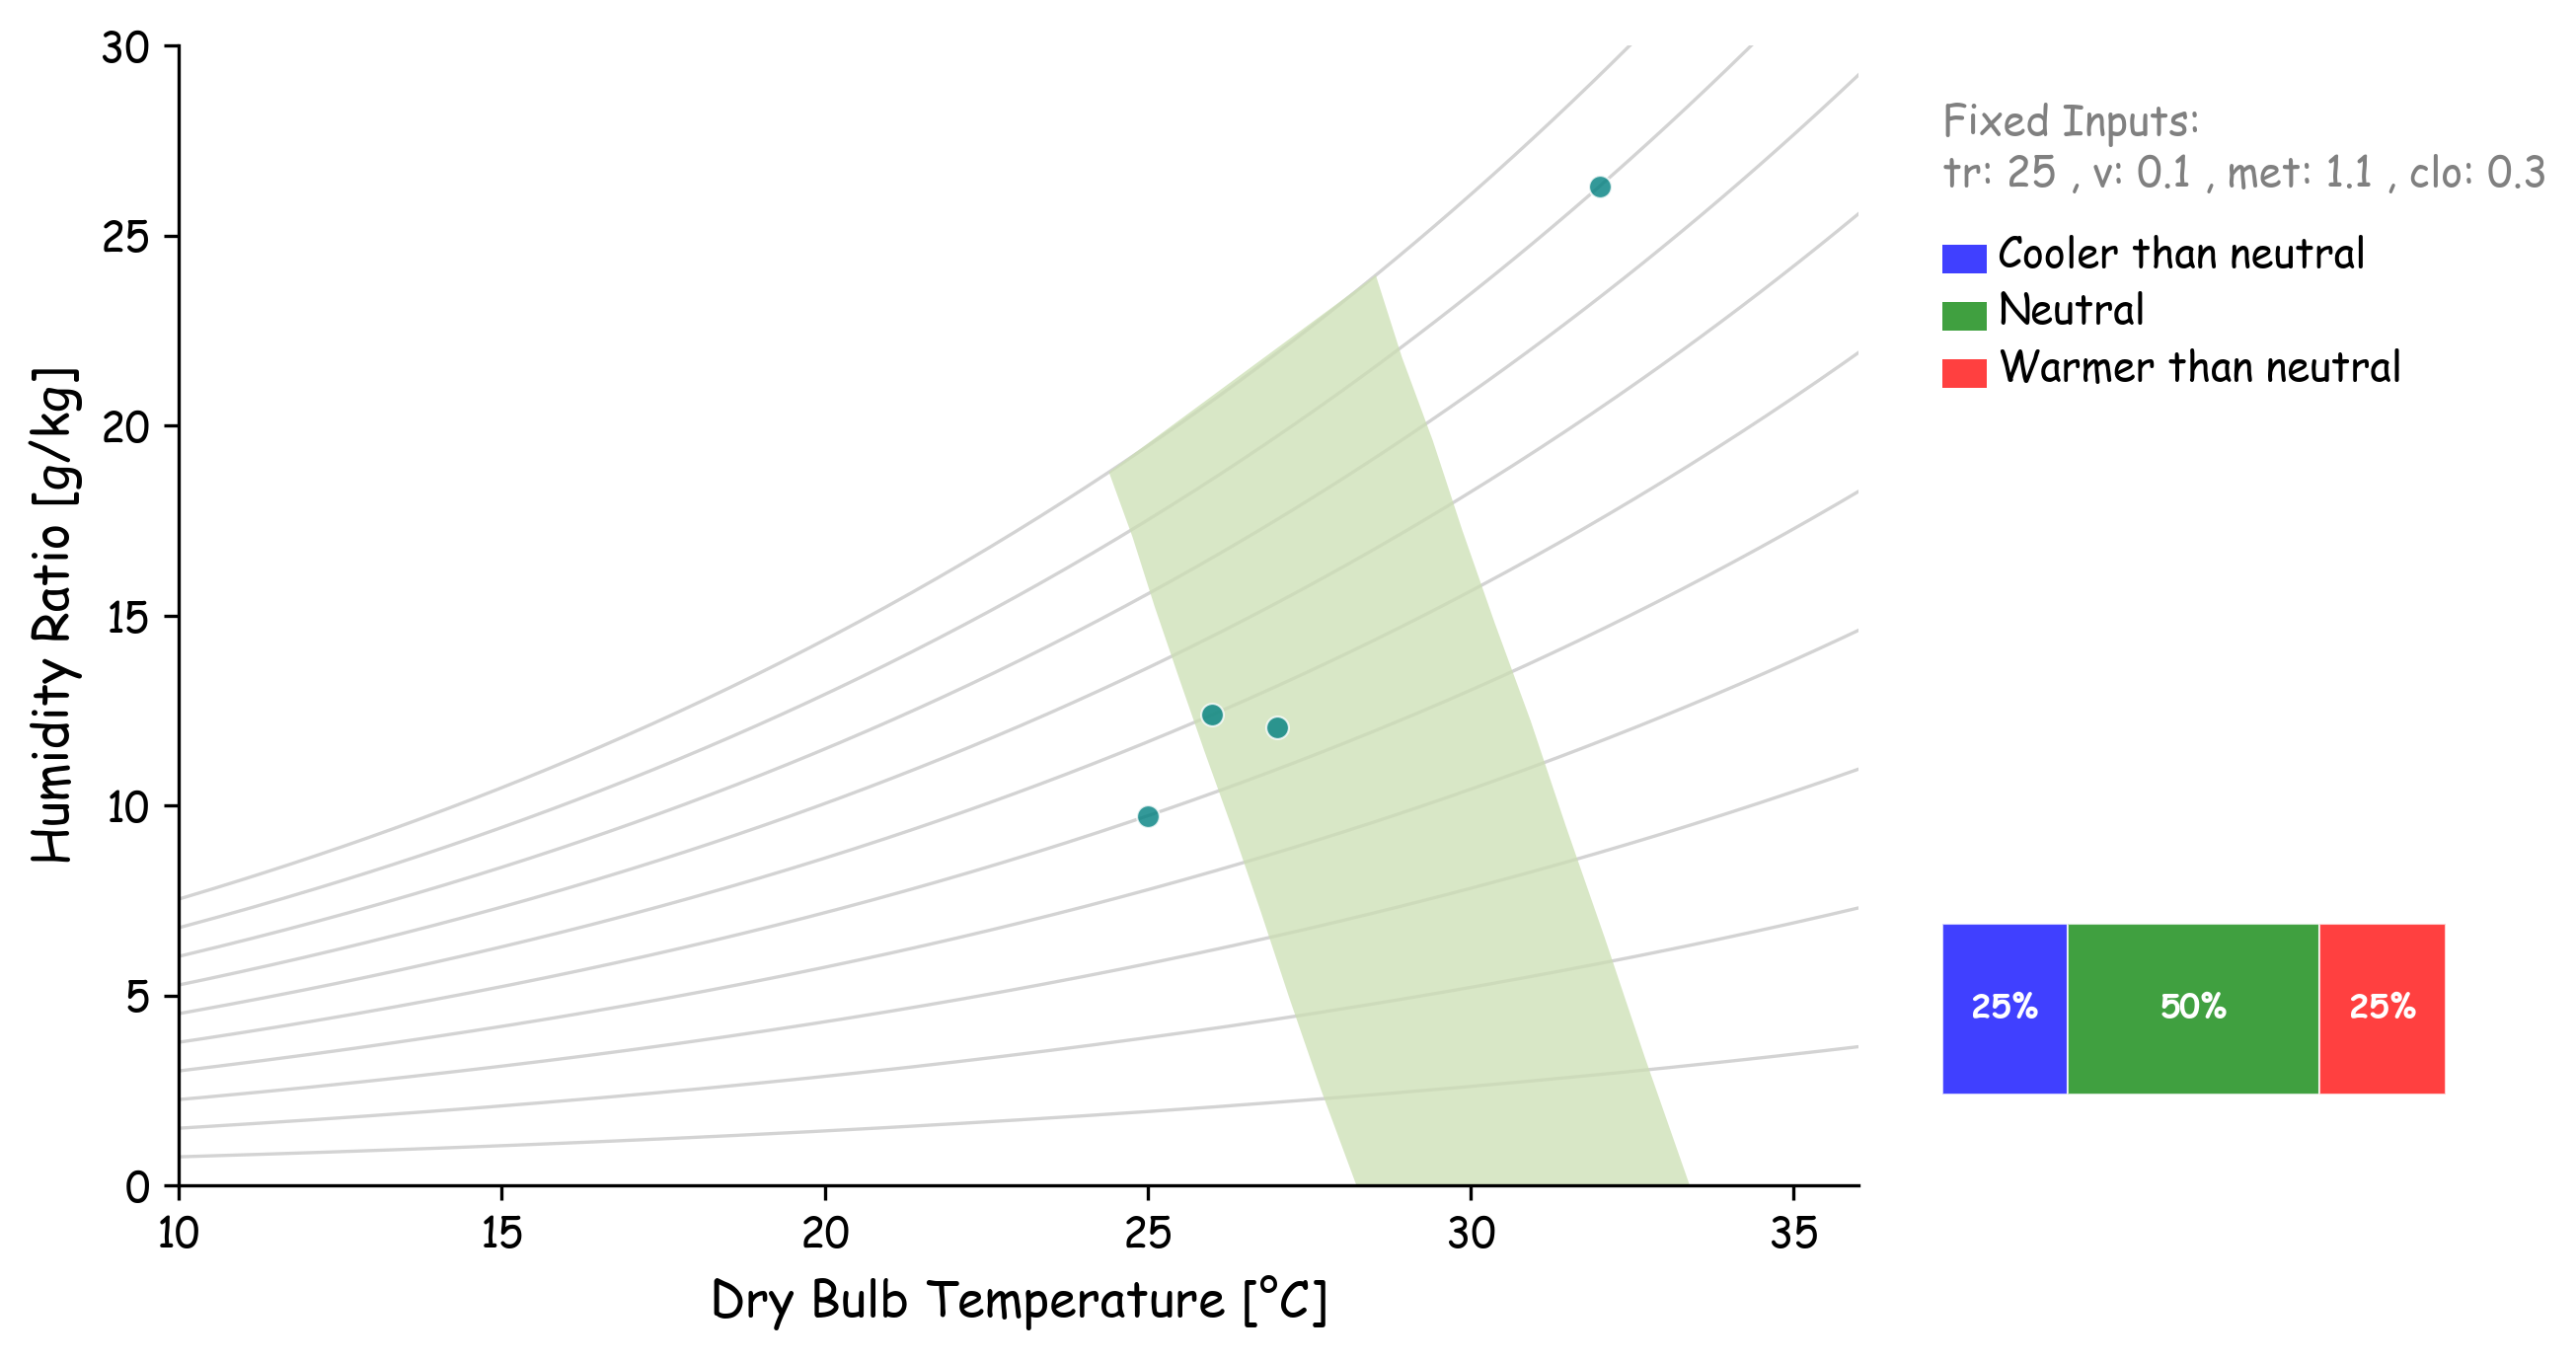

In [6]:
from pythermalcomfort.utilities import psy_ta_rh

tdb_values = [25.0, 26.0, 27.0, 32]
rh_values = [50.0, 60.0, 55.0, 90]

# Convert RH to humidity ratio
hr_values = [psy_ta_rh(t, rh/100, 101325)["hr"] * 100000 for t, rh in zip(tdb_values, rh_values)]

plot = Plot.psychrometric(fixed_params={"tr": 25, "v": 0.1, "met": 1.1, "clo": 0.3})
plot = plot.add_data(tdb_values, hr_values)
plot.style.show_summary = True
plot.style.font_family = "Comic Sans MS"  # Horrible font for testing
plot.style.scatter_color = "#008080"  # Teal color
fig, ax = plot.render()